<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/domaci-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<Axes: >

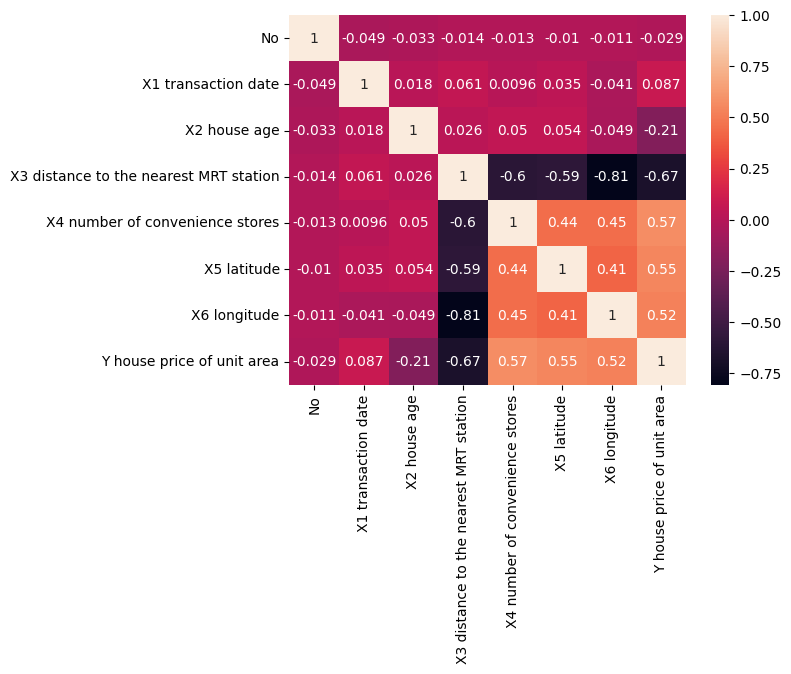

In [ ]:
import seaborn as sns
cor = df.corr()
sns.heatmap(cor, annot=True)

Na osnovu prikaza korelacione matrice vidi se da Y promenjiva najvise zavisi od X3 promenjive jer je koeficijent korelacije najekstremniji.

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
#df.rename({"X3*": "X3", "Y*" : "Y"})
data = df[['X3 distance to the nearest MRT station', 'Y house price of unit area']]
data = data.rename(columns={"X3 distance to the nearest MRT station":"X", 'Y house price of unit area': 'Y'})
train, test = train_test_split(data, test_size=0.2, random_state=42)

# racunamo beta
x_mean = np.mean(train["X"])
y_mean = np.mean(train["Y"])
brojilac = 0
imenilac = 0
for index, row in train.iterrows():
  x = row[0]
  y = row[1]
  brojilac += (x - x_mean)*(y-y_mean)
  imenilac += (x - x_mean) ** 2

beta = brojilac/imenilac

# racunamo alpha
alpha = y_mean - beta * x_mean


Index(['X', 'Y'], dtype='object')


In [14]:
## definicija metrika
import math
def rmse(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += (yt - yp) ** 2
  return math.sqrt(sum / len(y_true))

def mae(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += abs(yt - yp)
  return sum / len(y_true)

In [15]:
model = lambda x, alpha, beta: alpha + beta * x
y_pred = model(test['X'], alpha, beta)
y_true = test['Y']

print(rmse(y_true, y_pred))
print(mae(y_true, y_pred))

8.794543295998073
6.92097270357358


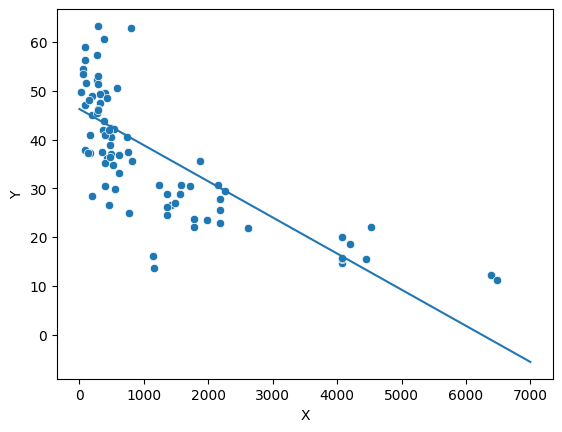

In [19]:
import matplotlib.pyplot as plt
sns.scatterplot(test, x='X', y='Y')
x = np.linspace(0, 7000)
y = model(x, alpha, beta)

sns.lineplot(x=x, y=y)
plt.show()